## load data

In [1]:
import json
import pandas as pd
from mlinterpreter.util import preprocess_data

In [2]:
# 读入数据 和 schema
data_path = "./data/adult.data"
schema_path = "./data/schema.json"
df = pd.read_csv(data_path, header=None)
df.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex",
                 "capital-gain","capital-loss","hours-per-week","native-country","income"]
with open(schema_path, "r") as f:
    schema = json.load(f)

## preprocess data

In [3]:
# 预处理数据
preprocess_df, preprocess_dict = preprocess_data(df=df, schema=schema, process_label=True)

## build  nn model

In [4]:
from mlinterpreter.model.builder import build_nn

In [5]:
# 构建 NN 模型， Wide & Deep
# 通过 params 参数修改模型超参数
nnmodel = build_nn(df=preprocess_df, schema=schema)

Epoch 1/10
102/102 [==============================] - 4s 12ms/step - loss: 0.3736 - auc: 0.8630 - val_loss: 0.3123 - val_auc: 0.9112
Epoch 2/10
102/102 [==============================] - 0s 4ms/step - loss: 0.3131 - auc: 0.9102 - val_loss: 0.3065 - val_auc: 0.9159
Epoch 3/10
102/102 [==============================] - 0s 4ms/step - loss: 0.3107 - auc: 0.9117 - val_loss: 0.3025 - val_auc: 0.9166
Restoring model weights from the end of the best epoch.
Epoch 00003: early stopping
Epoch 1/3
128/128 [==============================] - 3s 3ms/step - loss: 0.3584 - auc: 0.8763
Epoch 2/3
128/128 [==============================] - 0s 3ms/step - loss: 0.3109 - auc: 0.9117
Epoch 3/3
128/128 [==============================] - 0s 3ms/step - loss: 0.3076 - auc: 0.9134


## SHAP value

In [6]:
from mlinterpreter.shap.shap import ShapInterpreter

In [7]:
# 构建 interpreter
# model ： 待解释模型
# background_data: 背景数据
# schema : 数据schmea
# preprocess_dict: 预处理模块
interpreter = ShapInterpreter(model=nnmodel, background_data=preprocess_df.sample(50), schema=schema, preprocess_dict=preprocess_dict)


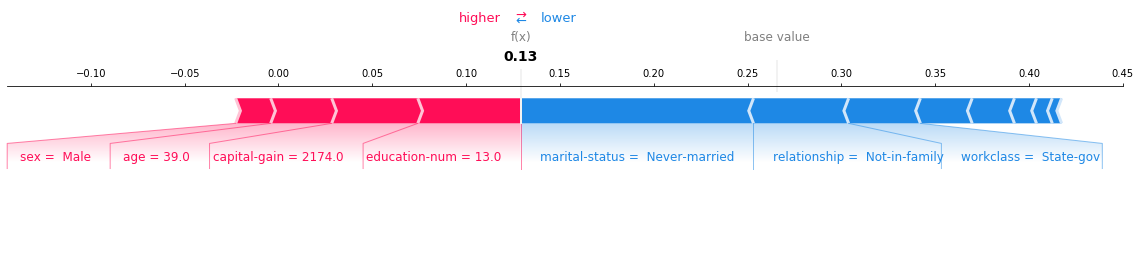

In [8]:
# plot SHAP value for one point
interpreter.force_plot(df=df.iloc[0,:])

  0%|          | 0/10 [00:00<?, ?it/s]

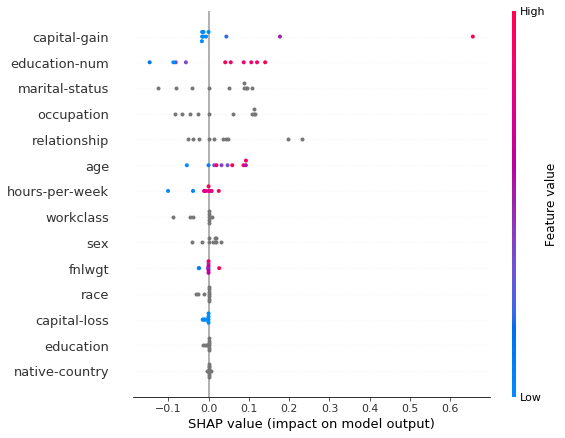

In [9]:
# dot plot summary with several points
# nsample: 在计算SHAP value时用，采样次数
interpreter.summary_plot(df=df.iloc[0:10,:], nsamples=500)

  0%|          | 0/10 [00:00<?, ?it/s]

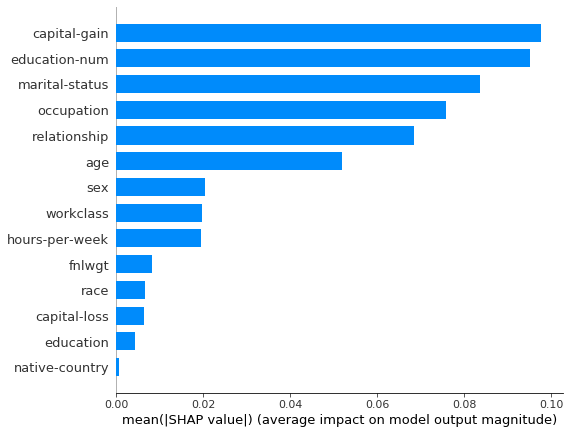

In [10]:
# bar plot summary with several points
# nsample: 在计算SHAP value时用，采样次数
interpreter.summary_plot(df=df.iloc[0:10,:], nsamples=500, plot_type='bar')

  0%|          | 0/10 [00:00<?, ?it/s]

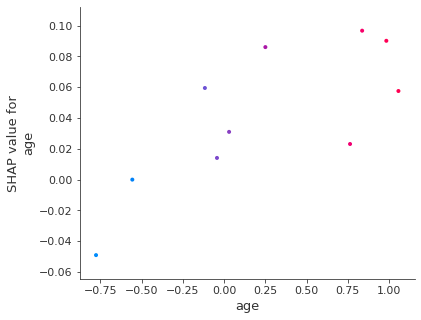

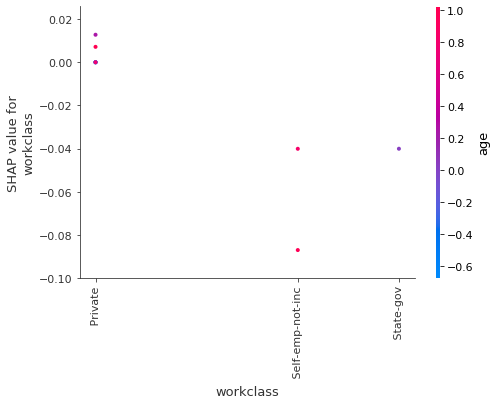

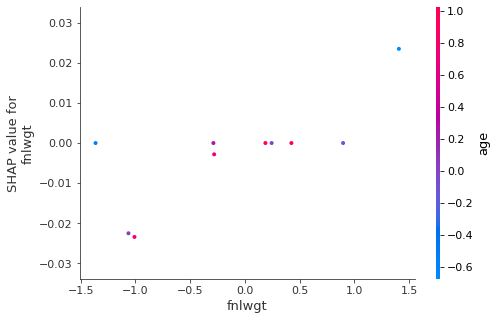

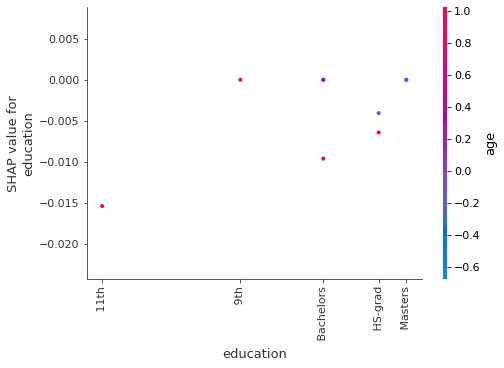

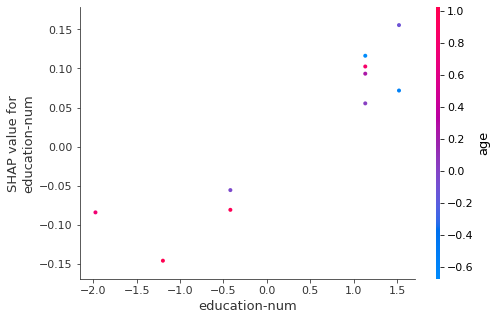

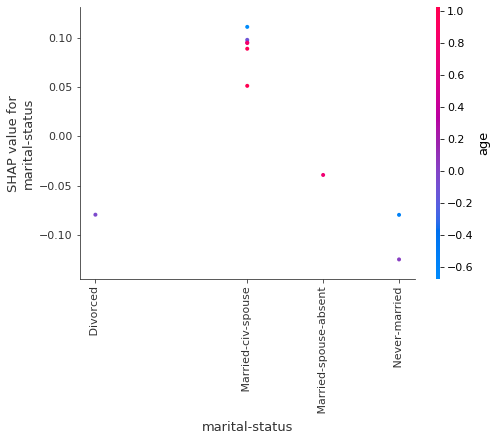

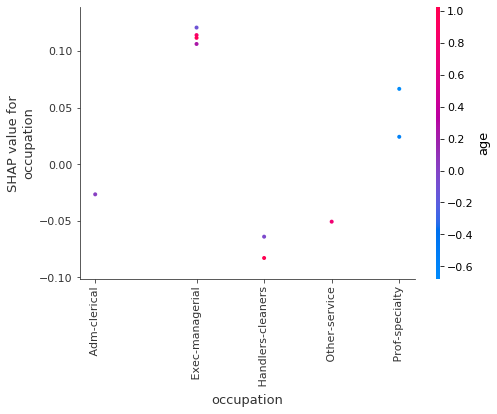

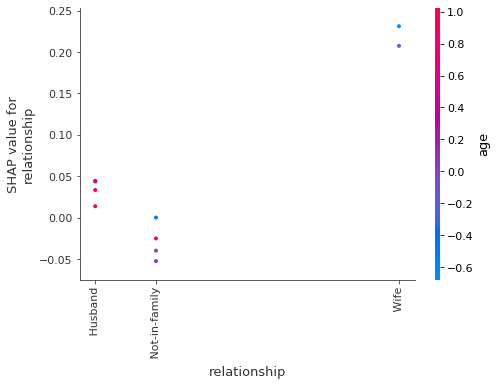

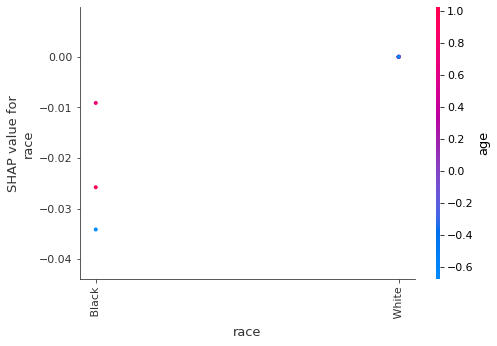

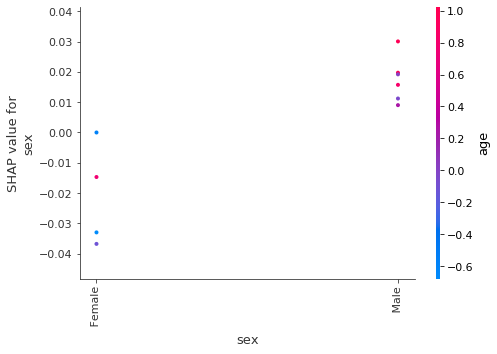

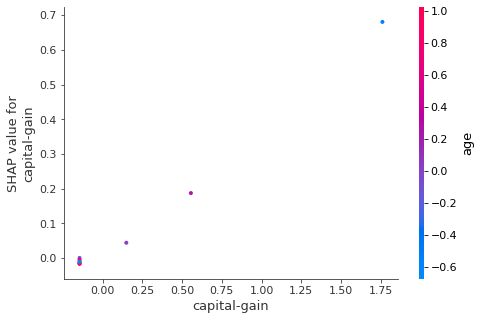

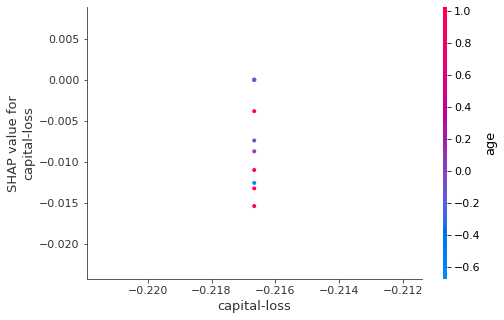

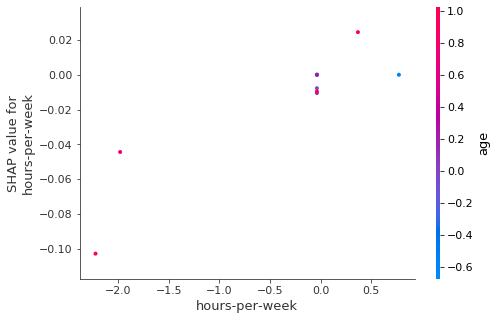

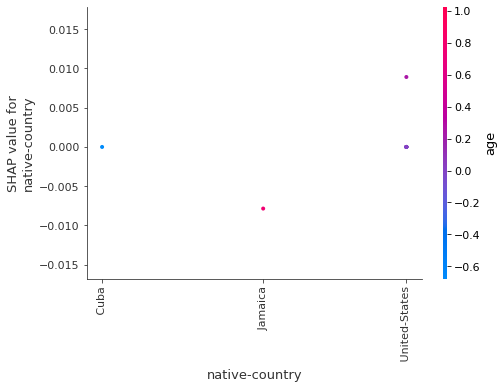

In [11]:
# dependence plot with several points
# nsample: 在计算SHAP value时用，采样次数
# if feature_name is not given, we will plot for all the features
interpreter.dependence_plot(df=df.iloc[0:10,:], nsamples=500)

  0%|          | 0/10 [00:00<?, ?it/s]

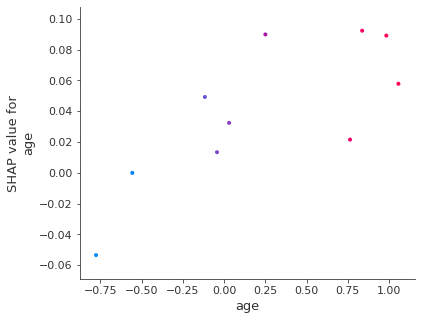

In [12]:
# dependence plot with several points
# nsample: 在计算SHAP value时用，采样次数
# specify a feature
interpreter.dependence_plot(df=df.iloc[0:10,:], feature_name='age', nsamples=500)

## build  LGBMClassifier

In [13]:
from mlinterpreter.model.builder import  build_lgb

In [14]:
import lightgbm

In [15]:
lightgbm.__version__

'3.0.0'

In [16]:
# 构建 lgb模型
# 通过 params 参数修改模型超参数
lgbmodel = build_lgb(df=preprocess_df, schema=schema)

Using categorical_feature in Dataset.
categorical_feature in Dataset is overridden.
New categorical_feature is ['education', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'workclass']


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=100. Current value: min_data_in_leaf=100


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[1]	valid_0's auc: 0.867131	valid_0's binary_logloss: 0.532603
Training until validation scores don't improve for 1 rounds
[2]	valid_0's auc: 0.87039	valid_0's binary_logloss: 0.515403
[3]	valid_0's auc: 0.883642	valid_0's binary_logloss: 0.500183
[4]	valid_0's auc: 0.885392	valid_0's binary_logloss: 0.486659
[5]	valid_0's auc: 0.88732	valid_0's binary_logloss: 0.474556
[6]	valid_0's auc: 0.892805	valid_0's binary_logloss: 0.463528
[7]	valid_0's auc: 0.892906	valid_0's binary_logloss: 0.453368
[8]	valid_0's auc: 0.89301	valid_0's binary_logloss: 0.44433
[9]	valid_0's auc: 0.893905	valid_0's binary_logloss: 0.435813
[10]	valid_0's auc: 0.893689	valid_0's binary_logloss: 0.428157
Early stopping, best iteration is:
[9]	valid_0's auc: 0.893905	valid_0's binary_logloss: 0.435813


Using categorical_feature in Dataset.


In [17]:
from mlinterpreter.shap.shap import ShapInterpreter

In [18]:
# 申明 interpreter
# model ： 待解释模型
# background_data: 背景数据
# schema : 数据schmea
# preprocess_dict: 预处理模块
interpreter = ShapInterpreter(model=lgbmodel, background_data=preprocess_df, schema=schema,  preprocess_dict=preprocess_dict)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


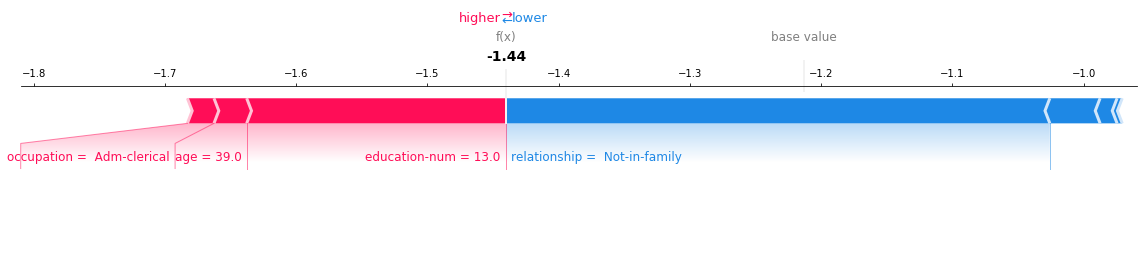

In [19]:
# plot SHAP value for one point
interpreter.force_plot(df.iloc[0,:])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


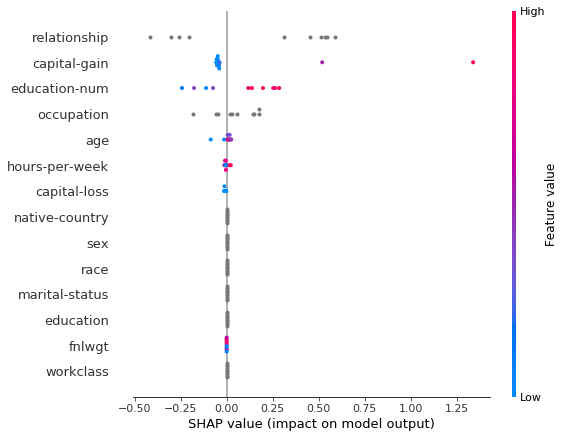

In [20]:
# dot plot summary with several points
# 对于树模型，nsample不是必要的
interpreter.summary_plot(df=df.iloc[0:10,:])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


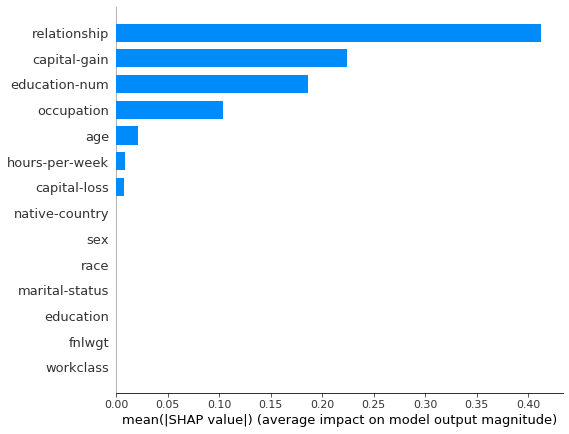

In [21]:
# bar plot summary with several points
# 对于树模型，nsample不是必要的
interpreter.summary_plot(df=df.iloc[0:10,:], plot_type="bar")

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


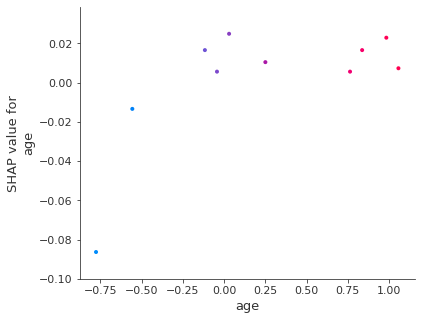

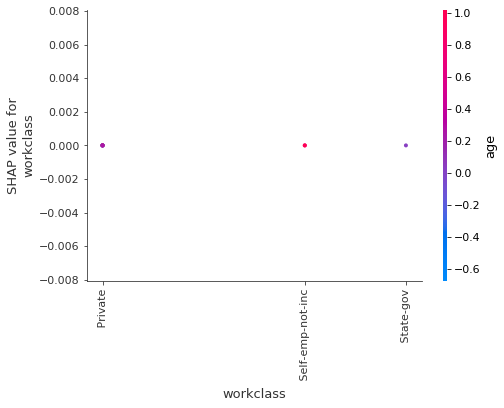

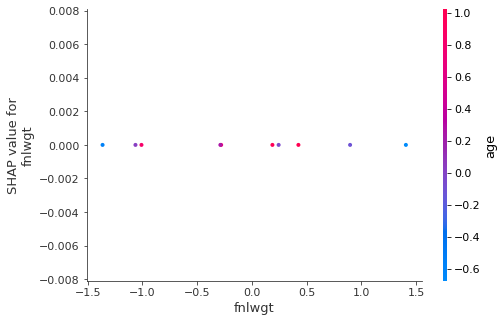

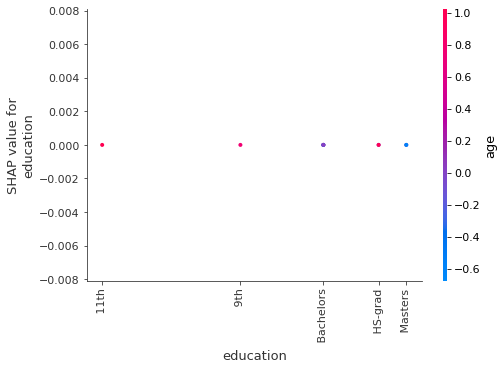

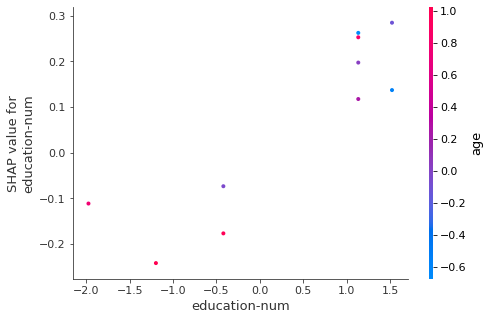

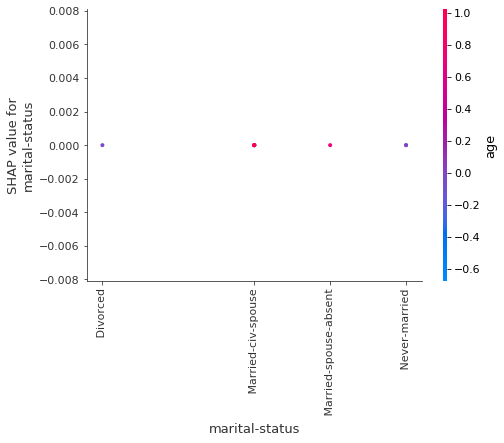

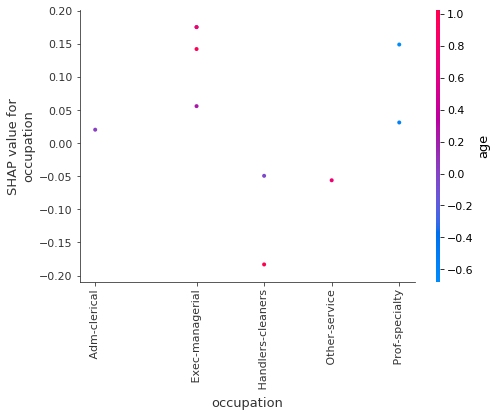

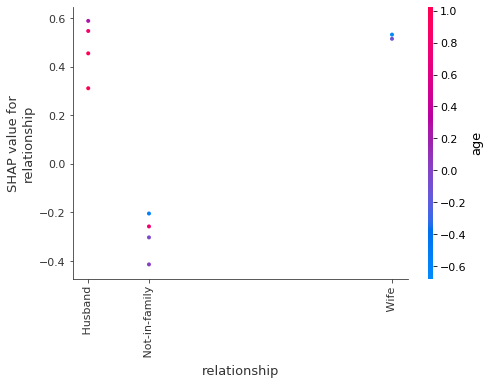

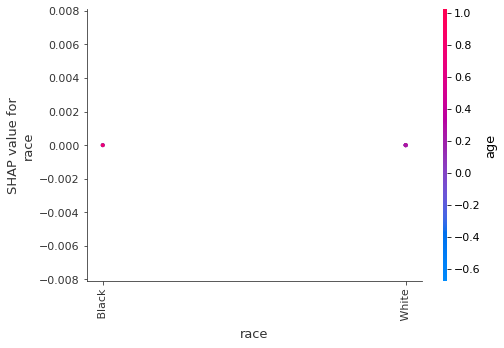

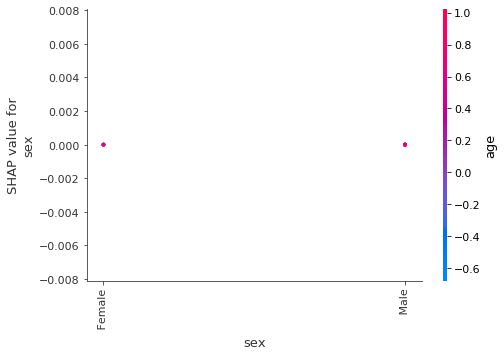

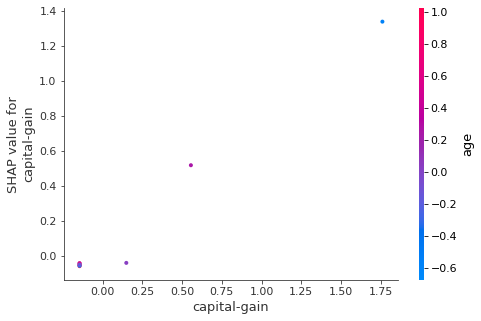

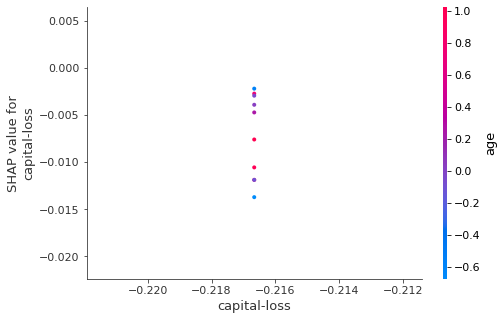

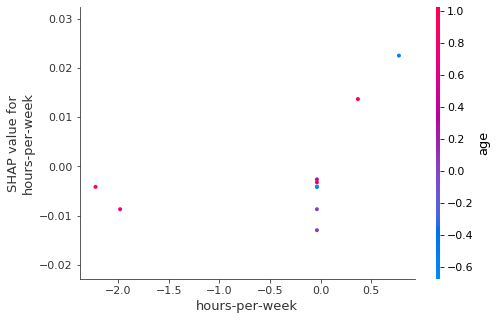

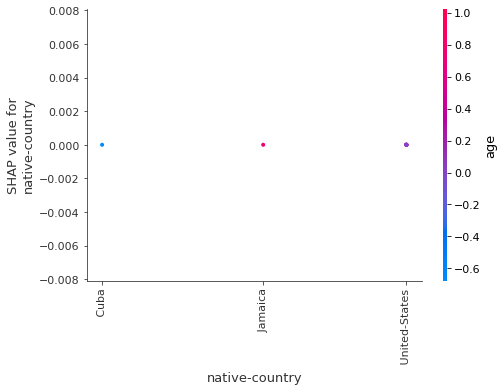

In [22]:
# dependence plot with several points
# nsample: 在计算SHAP value时用，采样次数
# if feature_name is not given, we will plot for all the features
interpreter.dependence_plot(df=df.iloc[0:10,:], nsamples=500)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


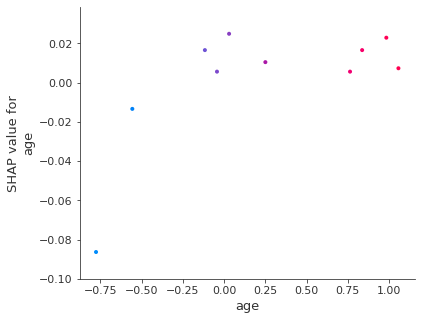

In [23]:
# dependence plot with several points
# nsample: 在计算SHAP value时用，采样次数
# specify a feature
interpreter.dependence_plot(df=df.iloc[0:10,:], feature_name='age', nsamples=500)